In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('movies2.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [7]:
print(df.columns)

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')


In [8]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [17]:
# Handle missing values
df = df.dropna(subset=['rating', 'released', 'score', 'votes', 'star', 'country', 'company', 'runtime'])


In [19]:
# Remove the country part
df['released'] = df['released'].str.extract(r'([A-Za-z]+\s\d{1,2},\s\d{4})')

# Convert to datetime
df['released'] = pd.to_datetime(df['released'], format='%B %d, %Y')

# Convert 'budget' and 'gross' to integer
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

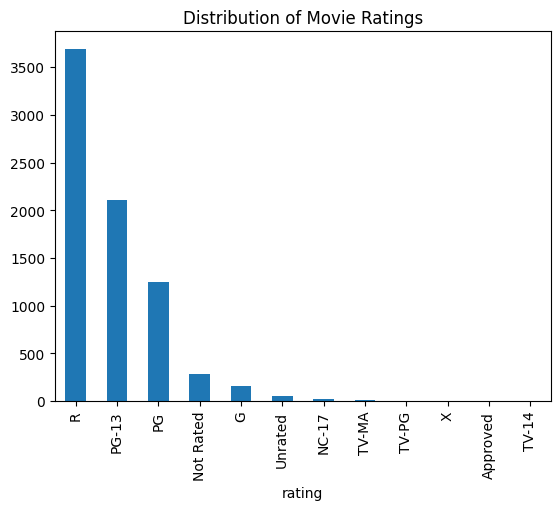

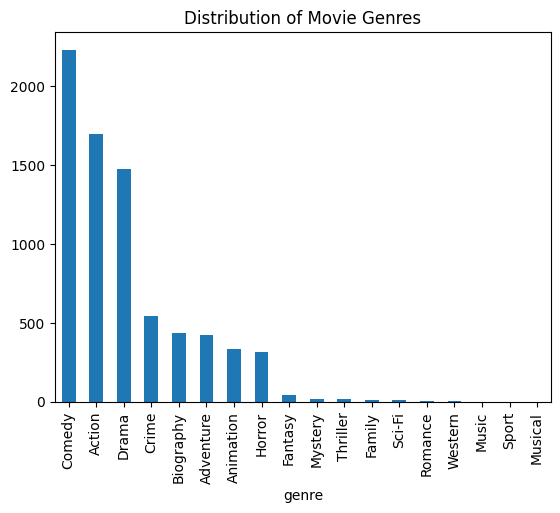

In [23]:
df.describe()
df['rating'].value_counts().plot(kind='bar', title='Distribution of Movie Ratings')
plt.show()
df['genre'].value_counts().plot(kind='bar', title='Distribution of Movie Genres')
plt.show()

In [38]:
df['director'] = df['director'].replace('Directors', 'Multiple Directors')
df['director'].value_counts().head(10)

director
Woody Allen           38
Clint Eastwood        31
Steven Spielberg      27
Multiple Directors    25
Ron Howard            24
Ridley Scott          23
Steven Soderbergh     23
Joel Schumacher       22
Barry Levinson        20
Tim Burton            19
Name: count, dtype: int64

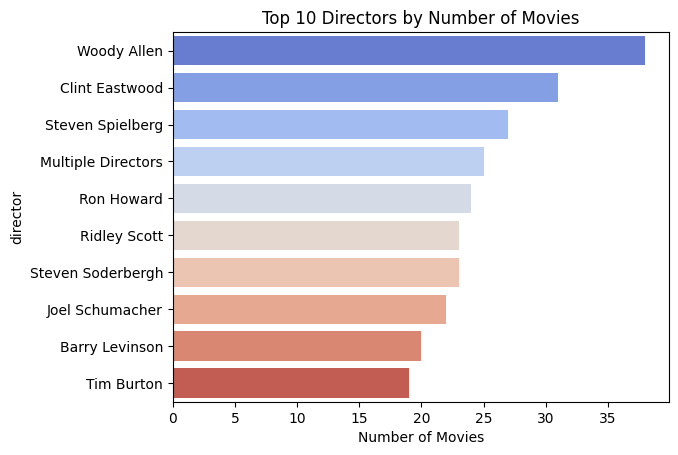

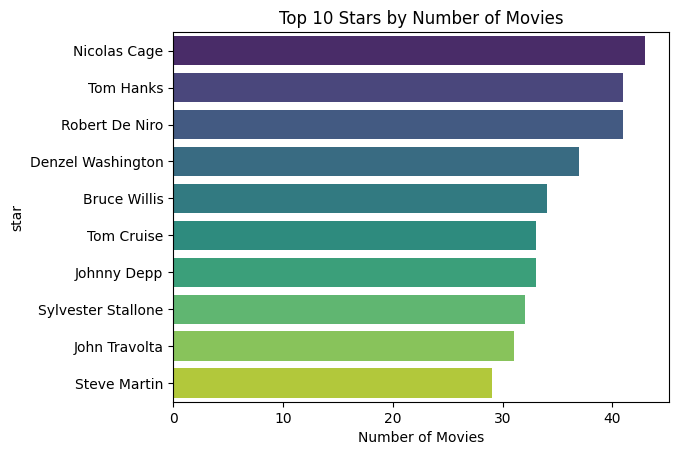

In [37]:
# Top 10 Directors by Number of Movies
top_directors = df['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, hue=top_directors.index, palette='coolwarm', legend=False)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.show()

# Top 10 Stars by Number of Movies
top_stars = df['star'].value_counts().head(10)
sns.barplot(x=top_stars.values, y=top_stars.index, hue=top_stars.index, palette='viridis', legend = False)
plt.title('Top 10 Stars by Number of Movies')
plt.xlabel('Number of Movies')
plt.show()

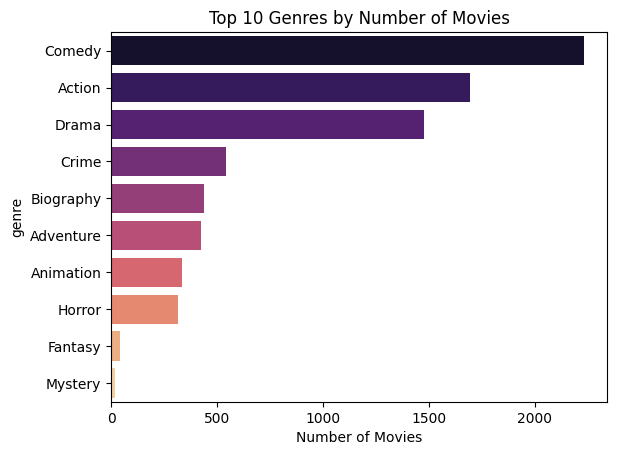

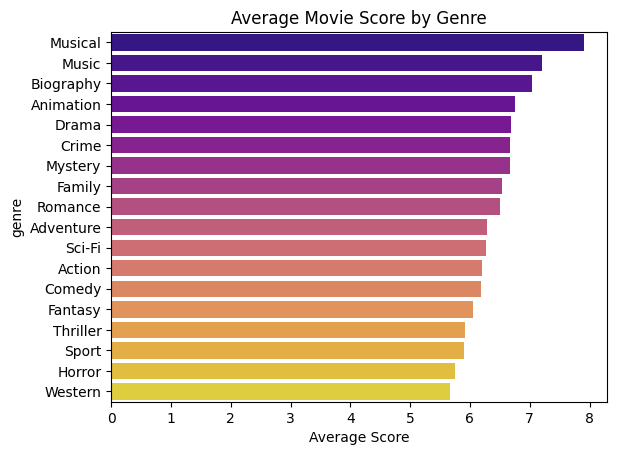

In [30]:
# Most Common Genres
top_genres = df['genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, hue = top_genres.index, palette='magma', legend=False)
plt.title('Top 10 Genres by Number of Movies')
plt.xlabel('Number of Movies')
plt.show()

# Average score and gross per genre
genre_scores = df.groupby('genre')['score'].mean().sort_values(ascending=False)
sns.barplot(x=genre_scores.values, y=genre_scores.index, hue= genre_scores.index, palette='plasma', legend=False)
plt.title('Average Movie Score by Genre')
plt.xlabel('Average Score')
plt.show()

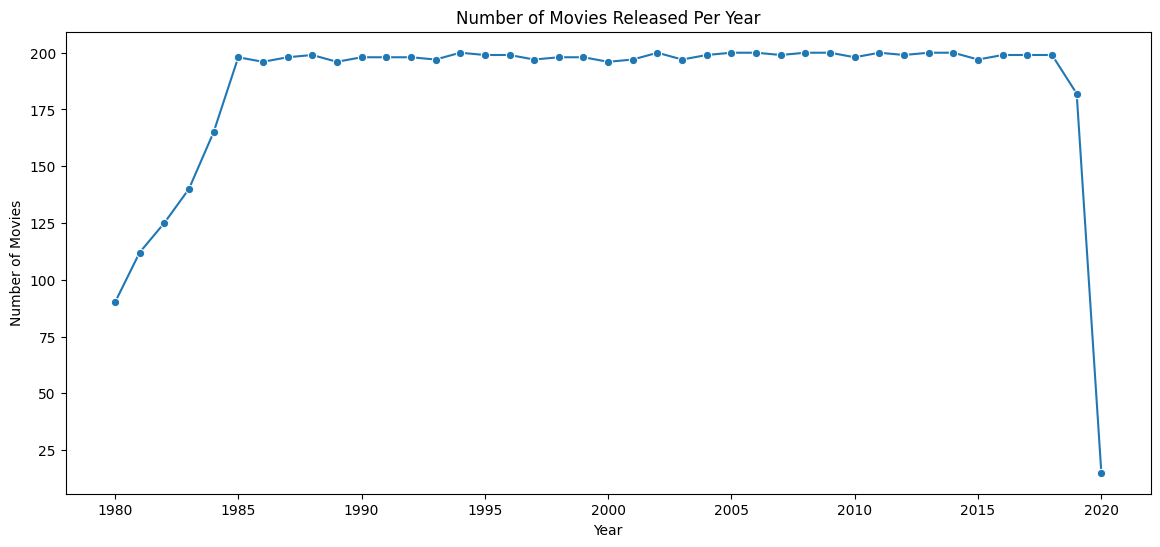

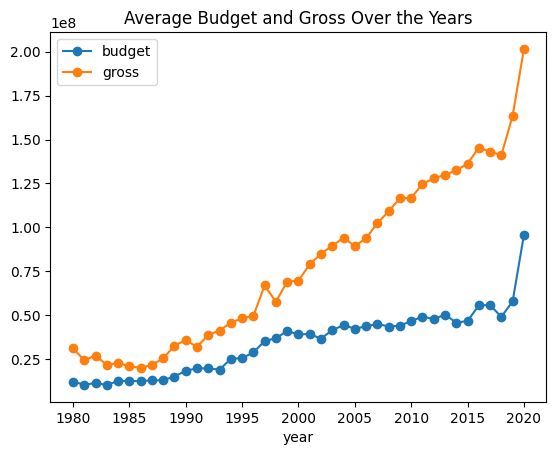

In [27]:
# Number of Movies Released Each Year
movies_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(14, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, marker='o')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Average budget and gross over the years
yearly_budget_gross = df.groupby('year')[['budget', 'gross']].mean()
yearly_budget_gross.plot(kind='line', title='Average Budget and Gross Over the Years', marker='o')
plt.show()

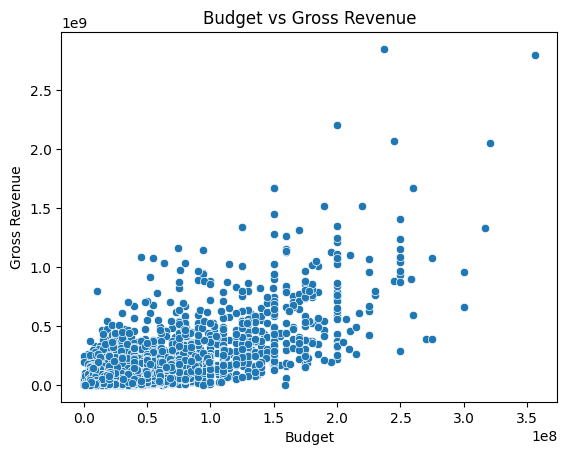

In [28]:
# Scatter plot for budget vs gross
sns.scatterplot(x='budget', y='gross', data=df)
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

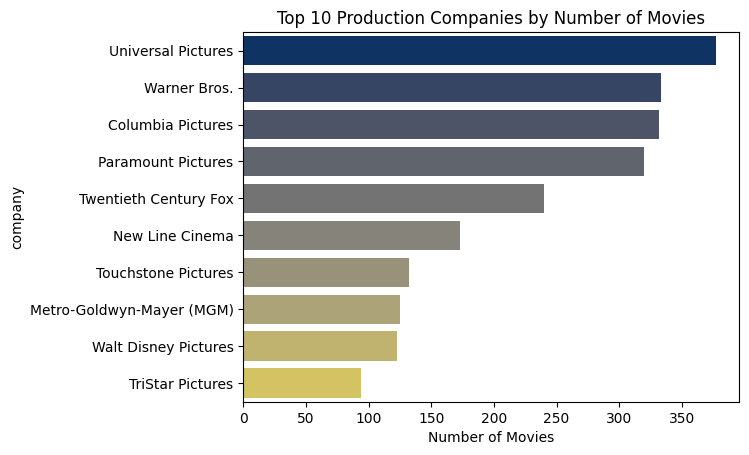

In [31]:
# Top 10 Production Companies by Number of Movies
top_companies = df['company'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index, hue= top_companies.index, palette='cividis', legend=False)
plt.title('Top 10 Production Companies by Number of Movies')
plt.xlabel('Number of Movies')
plt.show()